## Overfitting and Underfitting

Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.  Intuitively, overfitting occurs when the model or the algorithm fits the data too well.  

Overfitting is often a result of an excessively complicated model..


Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.  Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. 

Underfitting is often a result of an excessively simple model.

Both overfitting and underfitting lead to poor predictions on new data sets.

<img src="images/overfit.png"/>

### Bias/Variance

<img src="images/bias.PNG"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.shape

(10, 3)

In [5]:
#data.Position.value_counts()

In [6]:
X = data.iloc[:,1:2].values
X.shape

(10, 1)

In [7]:
y = data.iloc[:,2].values

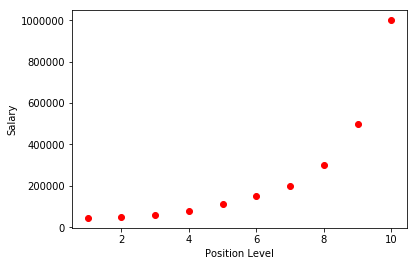

In [8]:
plt.scatter(X,y,color='red')
#plt.plot(X,lin_reg.predict(X),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
train_pred = lin_reg.predict(X)

In [12]:
r2_score(y,train_pred)

0.6690412331929895

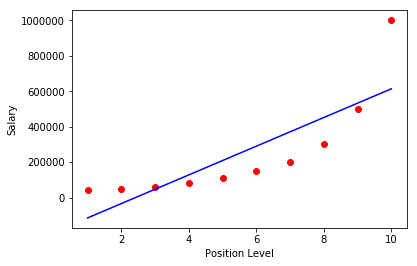

In [13]:
plt.scatter(X,y,color='red')
plt.plot(X,train_pred,color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting.

### fitting with Polynomial 

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=16)

NameError: name 'PolynomialFeatures' is not defined

In [ ]:
X_train_poly=poly.fit_transform(X)

In [ ]:
lin_poly = LinearRegression()
lin_poly.fit(X_train_poly,y)

In [ ]:
train_pred_poly = lin_poly.predict(X_train_poly) 

In [ ]:
r2_score(y,train_pred_poly)

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,train_pred_poly,color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Overfitting training data')
plt.show()

A polynomial of degree 6 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data..

In [21]:
poly = PolynomialFeatures(degree=2)

In [22]:
X_poly = poly.fit_transform(X)

In [23]:
lin_poly = LinearRegression()
lin_poly.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
X_pred_poly = lin_poly.predict(X_poly) 

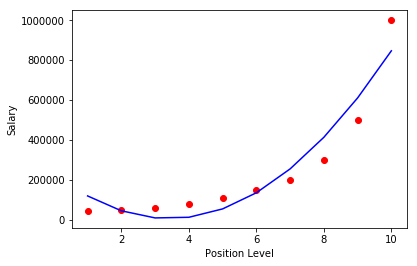

In [25]:
plt.scatter(X,y,color='red')
plt.plot(X,X_pred_poly,color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Reduce overfitting:Regularization

### Regularization is a technique to shrinks the coefficient parameters towards zero by adding additional term

### method for automatically penalizing extra features

### L1 and L2 regularization term  against model complexity

<img src="images/reg.png"/>

### L1 regularization:

- adds a penalty equal to the sum of the absolute value of the weights. 

- L1 can yield sparse features vectors (i.e. more features weights will be zero)

- this L1 can be useful in practice if we have a high-dimensional dataset with many features that are irrelevant..

- Some coefficients can become zero.. Lasso regression uses this method.

### L2 regularization:

- the sum of the square of the weights,

- L2 produces non-sparse coefficients, so does not have built-in feature selection property.

-  Ridge regression and SVMs use this method.

<img src="images/ridge.PNG"/>

###  Now, the coefficients are estimated by minimizing this function. Here, λ is the tuning parameter that decides how much we want to penalize the flexibility of our model.

### This is how the Ridge regression technique prevents coefficients from rising too high.

where α is a hyperparameter that controls the strength of the penalty. Hyperparameters are parameters of the model that are not learned automatically and must be set manually.

the value of alpha increases, the model complexity reduces. higher values of alpha reduce overfitting, significantly high values can cause underfitting as well

### Regression  model for predicting boston housing dataset

In [26]:
from sklearn.datasets import load_boston
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge

In [27]:
X = load_boston()

In [28]:
X.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
import pandas as pd

In [30]:
df=pd.DataFrame(X.data,columns=X.feature_names)

In [31]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
df['target']=X.target

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
df.shape

(506, 14)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X.data,X.target,test_size=.20,random_state=0)

In [36]:
lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lg.score(X_train,y_train)

0.7730135569264234

In [38]:
lg.score(X_test,y_test)

0.5892223849182507

In [39]:
#y_pred = lg.predict(X_test)
#r2_score(y_test,y_pred)

In [40]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
lg = LinearRegression()

In [42]:
lg.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#X_test_poly = poly.transform(X_test)

In [44]:
lg.score(X_test_poly,y_test)

0.6837330695927253

In [45]:
lg.score(X_poly,y_train)

0.9343246353735418

In [46]:
ridge_reg = Ridge()

In [47]:
ridge_reg.fit(X_poly,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
ridge_reg.score(X_poly,y_train)

0.9444265774330781

In [49]:
ridge_reg.score(X_test_poly,y_test)

0.6103895611842023

In [50]:
X_poly_test = poly.transform(X_test)

In [51]:
pred = ridge_reg.predict(X_poly_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test,pred)

0.6103895611842023

In [54]:
r2_score(y_train,ridge_reg.predict(X_poly))

0.9444265774330781

In [55]:
#ridge_reg.coef_